#**Building and Visualizing word frequencies**

In [14]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import numpy as np

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import string

nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [4]:
# download the stopwords for the process_tweet function
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

###**Load the NLTK sample dataset**

In [5]:
# select the lists of positive and negative tweets
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [6]:
# concatenate the lists, 1st part is the positive tweets followed by the negative
tweets = all_positive_tweets + all_negative_tweets

print(f"Number of tweets: {len(tweets)}")

Number of tweets: 10000


In [8]:
# make a numpy array representing labels of the tweets
labels = np.append(np.ones(len(all_positive_tweets)), np.zeros(len(all_negative_tweets)))

###**Creating Preprocessing & Word Frequency function**

In [15]:
def process_tweet(tweet):
    """Process tweet function.
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # Tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweet_clean = []
    for word in tweet_tokens:
      if (word not in stopwords_english and
          word not in string.punctuation):
        stem_word = stemmer.stem(word)
        tweet_clean.append(stem_word)

    return tweet_clean

def build_freqs(tweets, ys):
    """Build frequencies.
    Input:
        tweets: a list of tweets
        ys: an m x 1 array with the sentiment label of each tweet
            (either 0 or 1)
    Output:
        freqs: a dictionary mapping each (word, sentiment) pair to its
        frequency
    """
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
      for word in process_tweet(tweet):
        pair = (word, y)
        if pair in freqs:
          freqs[pair] += 1
        else:
          freqs[pair] = 1

    return freqs

In [17]:
# create frequency dictionary
freqs = build_freqs(tweets, labels)

# check data type
print(f'Type of freqs: {type(freqs)}')

# Check the len of freq
print(f'Length of Freqs: {len(freqs)}')

Type of freqs: <class 'dict'>
Length of Freqs: 13065


In [31]:
freqs

{('followfriday', 1.0): 25,
 ('top', 1.0): 32,
 ('engag', 1.0): 7,
 ('member', 1.0): 16,
 ('commun', 1.0): 33,
 ('week', 1.0): 83,
 (':)', 1.0): 3568,
 ('hey', 1.0): 76,
 ('jame', 1.0): 7,
 ('odd', 1.0): 2,
 (':/', 1.0): 5,
 ('pleas', 1.0): 97,
 ('call', 1.0): 37,
 ('contact', 1.0): 7,
 ('centr', 1.0): 2,
 ('02392441234', 1.0): 1,
 ('abl', 1.0): 8,
 ('assist', 1.0): 1,
 ('mani', 1.0): 33,
 ('thank', 1.0): 620,
 ('listen', 1.0): 16,
 ('last', 1.0): 47,
 ('night', 1.0): 68,
 ('bleed', 1.0): 2,
 ('amaz', 1.0): 51,
 ('track', 1.0): 5,
 ('scotland', 1.0): 2,
 ('congrat', 1.0): 21,
 ('yeaaah', 1.0): 1,
 ('yipppi', 1.0): 1,
 ('accnt', 1.0): 2,
 ('verifi', 1.0): 2,
 ('rqst', 1.0): 1,
 ('succeed', 1.0): 1,
 ('got', 1.0): 69,
 ('blue', 1.0): 9,
 ('tick', 1.0): 1,
 ('mark', 1.0): 1,
 ('fb', 1.0): 6,
 ('profil', 1.0): 2,
 ('15', 1.0): 5,
 ('day', 1.0): 246,
 ('one', 1.0): 129,
 ('irresist', 1.0): 2,
 ('flipkartfashionfriday', 1.0): 17,
 ('like', 1.0): 233,
 ('keep', 1.0): 68,
 ('love', 1.0): 400,


###**Table of word counts**

In [29]:
# select some words to appear in the report. we will assume that each word is unique (i.e. no duplicates)
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:
  # initialize positive and negative counts
  pos = 0
  neg = 0

  # retrieve number of positive counts
  if (word, 1) in freqs:
    pos = freqs[(word, 1)]

  # retrieve number of negative counts
  if (word, 0) in freqs:
    neg = freqs[(word, 0)]

  # append the word counts to the table
  data.append([word, pos, neg])

data

[['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


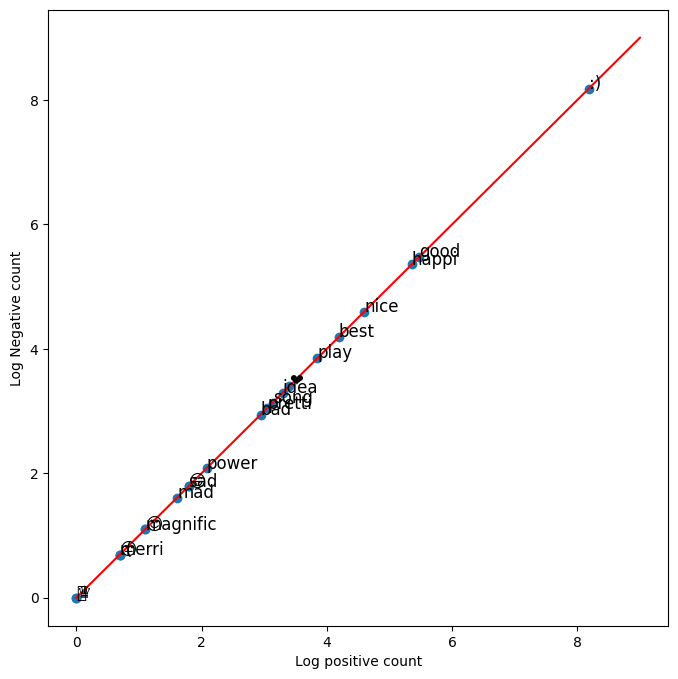

In [34]:
fig, ax = plt.subplots(figsize = (8, 8))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])

y = np.log([y[1] + 1 for y in data])

# Plot a dot for each pair of words
ax.scatter(x, y)

# Assign axis labels
plt.xlabel("Log positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
  ax.annotate(data[i][0], (x[i], y[i]), fontsize = 12)

ax.plot([0,9], [0,9], color = 'red')
plt.show()